# 使用 kNN 算法预测鸢尾花数据集（官网例子）

来自官方网站的例子：http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py

只不过加上了我写的中文注释。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors,datasets

In [2]:
n_neighbors = 15

In [3]:
iris = datasets.load_iris()

In [4]:
X = iris.data[:,:2]
y = iris.target

In [13]:
X[:20]

array([[ 5.1,  3.5],
       [ 4.9,  3. ],
       [ 4.7,  3.2],
       [ 4.6,  3.1],
       [ 5. ,  3.6],
       [ 5.4,  3.9],
       [ 4.6,  3.4],
       [ 5. ,  3.4],
       [ 4.4,  2.9],
       [ 4.9,  3.1],
       [ 5.4,  3.7],
       [ 4.8,  3.4],
       [ 4.8,  3. ],
       [ 4.3,  3. ],
       [ 5.8,  4. ],
       [ 5.7,  4.4],
       [ 5.4,  3.9],
       [ 5.1,  3.5],
       [ 5.7,  3.8],
       [ 5.1,  3.8]])

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
# 每一个网格之间的间距，在后面的 np.meshgrid 方法中可以用到
h = 0.02 

In [33]:
# ListedColormap 传入一个颜色列表，可以放多一些，因为如果颜色不够用的话，就会循环选取，会影响可视化的结果。
# 背景网格的颜色，应该选择浅一些的颜色
cmap_light = ListedColormap(['#FFFFF0','#B0E2FF','#FFE1FF'])
# 训练数据集的颜色，应该选择深一些的颜色
cmap_bold = ListedColormap(['r','b','g'])

理解下面这段代码最好的方式就是自己敲一遍。
另外，要熟悉下面的 API：

+ np.meshgrid
+ np.c_[()]
+ np.ravel()

mesh 是网格的意思。

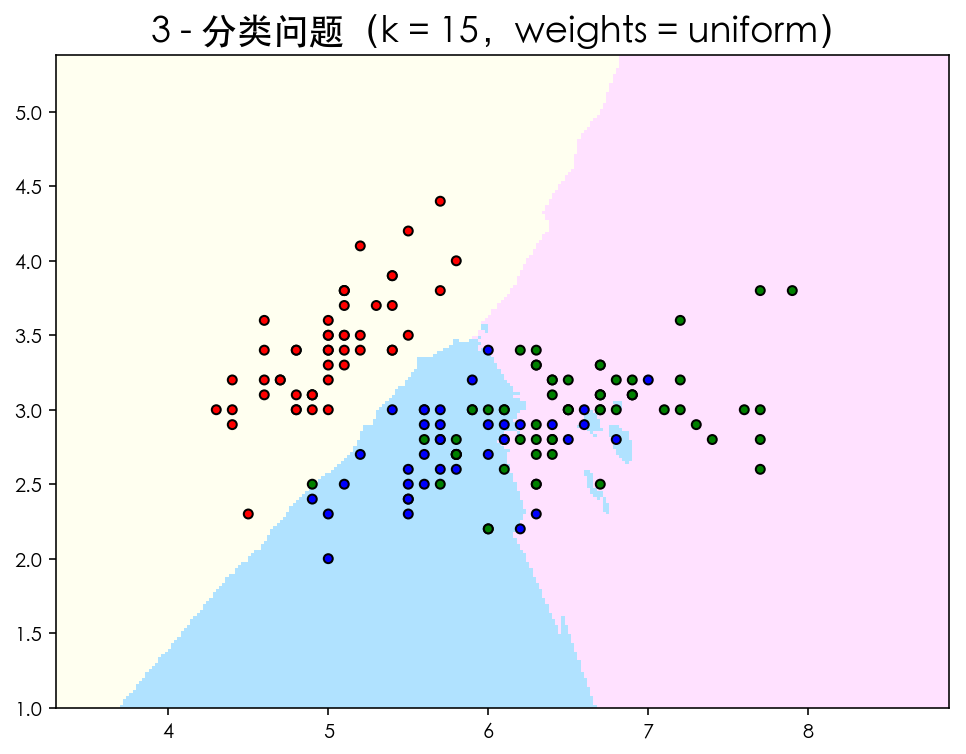

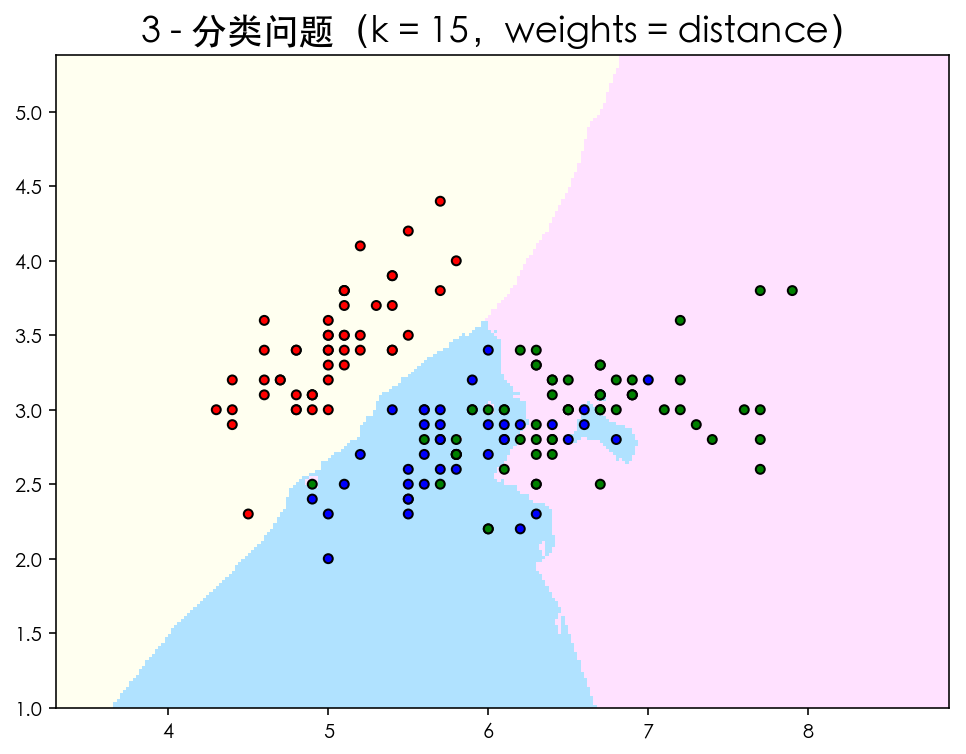

In [35]:
for weights in ['uniform','distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors,weights=weights)
    clf.fit(X, y)
    
    # 画出决策边界
    x1_min, x1_max = X[:,0].min() -1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max() + 1
    # 画出网格
    xx1,xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                          np.arange(x2_min, x2_max, h))
    # 对于上面的每一个点，都使用 kNN 算法预测一下它们的类别
    Z = clf.predict(np.c_[xx1.ravel(),xx2.ravel()])
    # 这里得到的 Z 的形状是拉平了以后的，
    # 要在 matplotlib 中画出图，需要 reshape 成网格的形状
    # 即 xx1 的形状，或者 xx2 的形状
    
    # 或者 Z = Z.reshape(xx2.shape)
    Z = Z.reshape(xx1.shape)
    
    plt.figure(figsize=(8,6))
    
    # 画出网格，使用亮色，因为这些密密麻麻的点都是背景
    plt.pcolormesh(xx1,xx2,Z,cmap = cmap_light)
    # 画出训练数据集那些点
    # x 表示直角坐标系中 x 轴的坐标值
    # y 表示直角坐标系中 y 轴的坐标值
    # c 表示 scatter 出来的那些点的颜色，会根据 cmap 参数提供的 ListedColormap 对象中的列表依次选取
    # edgecolor 表示 scatter 出来的那些点的边的颜色
    # s 的意思是 size，scatter 出来的那些点的大小
    plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=cmap_bold,edgecolor='k', s=20)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.title('3 - 分类问题（k = {}，weights = {}）'.format(n_neighbors,weights),fontsize=18)
plt.show()